# 15. Model extensions

## Numerical experiments - Week 18/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

Despite the moderate success of the analytical model in explaining the phase transition of the spore inoculum from a germinated to an ungerminated state when the critical threshold of $10^5$ spores/mL is crossed, a few issues remain to be addressed:

- It is known that spore cultures reach an asymptotic limit of their germination fraction, but the new analytical model has not yet been shown to represent that.
- The estimated effective permeation constant $P_{\textrm{eff}}$ is too low for any realistic barrier which does not interact with the inhibitor.
- The model cannot represent density-driven inhibition and exogenously driven exhibition in parallel.

The following model extensions are an attempt to address these issues.

## Prerequisite libraries

In [1]:
using PyPlot
using Revise

Revise.includet("./conversions.jl")
Revise.includet("./diffusion.jl")
Revise.includet("./setup.jl")
Revise.includet("./plotting.jl")
Revise.includet("./analysis.jl")
using .Conversions
using .Diffusion
using .Setup
using .Plotting
using .Analysis

## 1. Replicating Dantigny-like behaviour

### 1.1. Implementation of the Dantigny model

The model developed by Dantigny et al. [1] describes the germination percentage of a fungal culture through the formula

$$
\begin{equation}
p=p_{\textrm{max}}\left[1-\frac{1}{1+\left(\frac{t}{\tau_g}\right)^\nu}\right].
\end{equation}
$$

In it, $t$ is the time of evaluation of the probability, $p_{\textrm{max}}$ is a saturation limit of the germination fraction, $\tau_g$ is a characteristic germination time denoting the inflection point where $p=p_{\textrm{max}}/2$ and $\nu$ is a design parameter representing the heterogeneity of the culture.

It has been shown that the value of $p$ in this model saturates to $p_{\textrm{max}}$ in the long-time limits and has an asymmetrical sigmoid shape for $\nu>1$. As an illustration, some inferred parameters from Ijadpanahsaravi et al. [2] which describe the germination rate of _A. niger_ conidia in an alanine-rich environment, at a density of $1.333\times 10^5$ spores/mL, are $p_{\textrm{max}}=84.14$, $\tau_g=5.77$ and $\nu=3.36$. The code below illustrates the evolution of the germination percentage over the course of 50 hours.

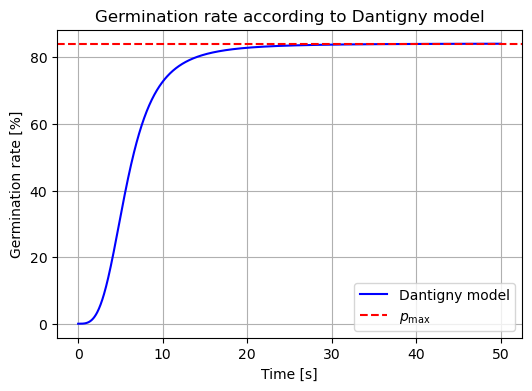

In [16]:
function dantigny(t, p_max, τ, ν)
    """
    Dantigny model for the germination of a fungal culture.
    inputs:
        t: time (in hours)
        p_max: maximum germination rate
        τ: time constant (in hours)
        ν: design parameter (dimensionless)
    outputs:
        p: germination rate (dimensionless)
    """
    p = p_max * (1 - 1 / (1 + (t / τ)^ν))
    return p
end

t_max = 50 # hours
p_max = 84.14
τ = 5.77
ν = 3.36

times = LinRange(0, t_max, 1000)
ps = dantigny.(times, p_max, τ, ν)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(times, ps, label="Dantigny model", color="blue")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Germination rate [%]")
ax.grid()
ax.set_title("Germination rate according to Dantigny model")

ax.axhline(y=p_max, color="red", linestyle="--", label=L"p_{\text{max}}")
ax.legend()

gcf()

### 1.2. Time-dependent germination probability

Next, the time-dependent germination probability is simulated using the volume-based analytical model, with parameters fitted as in Notebook 14.

## 2. Cell wall adsorption model

## 3. Permeation modulation model

## References

- [1] Dantigny, P., Nanguy, S.P., Judet-Correia, D., & Bensoussan, M. (2011). A new model for germination of fungi. International journal of food microbiology, 146 2, 176-81 .
- [2] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” _International journal of food microbiology_ 410 (2023): 110495 .